##  Introduction

This project utilizes the publicly available dataset which includes URL, ID, Lng, Lat, CommunityID, TradeTime, DOM(days on market), Followers, Total price, Price, Square, Living Room, number of Drawing room, Kitchen and Bathroom, Building Type, Construction time, renovation condition, building structure, Ladder ratio( which is the proportion between number of residents on the same floor and number of elevator of ladder), elevator, Property rights for five years（related to China's restricted purchase of houses policy), Subway, District, Community average price to develop a time series forecasting model for Housing Proce Prediction.

## Import Modules

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset: https://www.kaggle.com/datasets/ruiqurm/lianjia

## Load Beijing House Prices as a dataframe

In [2]:
# Import data 
# csv file contains some chinese characters in the "Floor" column, as a result gbk encoding is implemented to read files
data = pd.read_csv("../Beijing House Price.csv", encoding="gbk")
data

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\3283010101.py:3: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/FATTY/Downloads/Beijing House Price.csv", encoding="gbk")


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

## Drop features that are not important to the analysis and model training

In [4]:
data = data.drop(["url", "id", "Cid"],  axis='columns')
data

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,903.0,126,575.0,43436,132.38,2,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,965.0,138,297.5,22202,134.00,3,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,927.0,286,392.0,48396,81.00,2,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,1.0,8,350.0,20580,170.07,3,2,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,116.497474,39.810115,2016-06-10,NaN,1,108.8,31006,35.09,1,0,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,116.497256,39.804081,2016-06-05,1.0,2,359.0,35138,102.17,2,2,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,116.501794,39.799347,2016-06-12,NaN,4,720.0,40373,178.34,4,2,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


### Handle Missing Data

In [5]:
data.isna().sum()

Lng                         0
Lat                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

###### ***Note
From the above, 157,977 of Days on Market (DOM) values are missing this is almost half of the entire dataset. It is therefore 
important to try an salvage the missing data. The other variables with missing data are "buildingType", "elevator", "fiveYearsProperty" "subway" and "communityAverage". However the missing data for this variables are not that many compared to the entire dataset. As a result, the missing data for those variables can be deleted therefore be deleted.

In [6]:
# First return the statistical features for the data
# calcute the data skewness in order help replace the missing data in column DOM
data.describe()
data.skew()

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\3972768750.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Lng                      0.300903
Lat                      0.239349
DOM                      4.358766
followers                6.249823
totalPrice               4.719374
price                    1.302865
square                   2.267426
kitchen                 -2.167032
buildingType            -0.800996
renovationCondition     -0.237933
buildingStructure       -0.464394
ladderRatio            399.279351
elevator                -0.311947
fiveYearsProperty       -0.608793
subway                  -0.412983
district                -0.300734
communityAverage         1.033823
dtype: float64

In [7]:
# Since the data for DOM is positively skewed by ~4.719, the median will be used to replaced the missing values in DOM
data['DOM'].replace([np.nan], data['DOM'].median(), inplace=True )

In [8]:
# Check to ensure that all the missing data for DOM are replaced 
data.isna().sum()

Lng                       0
Lat                       0
tradeTime                 0
DOM                       0
followers                 0
totalPrice                0
price                     0
square                    0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
floor                     0
buildingType           2021
constructionTime          0
renovationCondition       0
buildingStructure         0
ladderRatio               0
elevator                 32
fiveYearsProperty        32
subway                   32
district                  0
communityAverage        463
dtype: int64

In [9]:
# Now remove all the rows with missing data under "buildingType", "elevator", "fiveYearsProperty", "subway", and "communityAverage"
data=data.dropna()
data.isna().sum()

Lng                    0
Lat                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [10]:
# Some of the data points in the variable constructionTime are labeled as '未知' it is important to delete this values first
# Living room is also missing some variables labelled as #NAME Delete those missing values
constructionTime_drop = data.index[data['constructionTime']=='未知'].tolist()
data.drop(index=constructionTime_drop, inplace=True)
livingRoom_drop = data.index[data['livingRoom']=='#NAME?'].tolist()
data.drop(index=livingRoom_drop, inplace=True)
data.head(100) #visualize top 100 data

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\1285260810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=constructionTime_drop, inplace=True)
C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\1285260810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=livingRoom_drop, inplace=True)


,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,903.0,126,575.0,43436,132.38,2,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,965.0,138,297.5,22202,134.00,3,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,927.0,286,392.0,48396,81.00,2,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,116.238792,39.852889,2016-07-11,423.0,29,208.0,31288,66.48,1,1,...,4.0,2004,1,2,0.500,0.0,1.0,0.0,2,43567.0
103,116.477730,40.002156,2016-09-07,479.0,61,650.0,49243,132.00,4,1,...,1.0,1997,4,6,0.250,1.0,1.0,1.0,7,60348.0
104,116.508181,39.807662,2016-08-27,468.0,96,127.0,26805,47.38,1,1,...,1.0,2008,3,6,0.200,1.0,1.0,1.0,3,28609.0
105,116.508181,39.807662,2016-08-29,470.0,154,145.0,27272,53.17,1,1,...,1.0,2008,3,6,0.200,1.0,0.0,1.0,3,28609.0


## Data Visualization to see how different variables impact the housing price

# 1. Caterorical input variables
   Assign levels to the dataset as indicated in the descriptive file of the dataset

### A. buildingType: 
tower(1), bungalow(2), combination of plate and tower(3), plate(4)

In [11]:
# Using Numpy to replace the nominal variables into categorical variables buildingType
conditions_buildingType = [data.buildingType==1,
                          data.buildingType==2,
                          data.buildingType==3,
                          data.buildingType==4]

values = ["Tower", "Bungalow", "Plate/Tower", "Plate"]
data['buildingType'] = np.select(conditions_buildingType, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\3101458178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['buildingType'] = np.select(conditions_buildingType, values)


### B. renovationCondition: 
Other(1), Rough(2), Simplicity(3), Hardcover(4)

In [12]:
# Using Numpy to replace the nominal variables into categorical variables renovationCondition
conditions_renovationCondition = [data.renovationCondition==1,
                                  data.renovationCondition==2,
                                  data.renovationCondition==3,
                                  data.renovationCondition==4]

values = ["Other", "Rough", "Simplicity", "Hardcover"]
data['renovationCondition'] = np.select(conditions_renovationCondition, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\573589071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['renovationCondition'] = np.select(conditions_renovationCondition, values)


### C. buildingStructure:
Unavailable(1), Mixed(2), Brick/Wood(3), Brick/Concrete(4), Steel(5), Steel/Concrete(6)

In [13]:
# Using Numpy to replace the nominal variables into categorical variables buildingStructure
conditions_buildingStructure = [data.buildingStructure==1,
                                data.buildingStructure==2,
                                data.buildingStructure==3,
                                data.buildingStructure==4,
                                data.buildingStructure==5,
                                data.buildingStructure==6
                               ]

values = ["Unavailable", "Mixed", "Brick/Wood", "Brick/Concrete","Steel","Steel/Concrete"]
data['buildingStructure'] = np.select(conditions_buildingStructure, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2208310984.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['buildingStructure'] = np.select(conditions_buildingStructure, values)


### D. subway:
No(0), Yes(1)

In [14]:
# Using Numpy to replace the nominal variables into categorical variables subway
conditions_subway = [data.subway==1,
                     data.subway==0
                    ]

values = ["Yes", "No"]
data['subway'] = np.select(conditions_subway, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\117100217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subway'] = np.select(conditions_subway, values)


### E. elevator: 
No(0), Yes(1)

In [15]:
# Using Numpy to replace the nominal variables into categorical variables elevator
conditions_elevator = [data.elevator==1,
                     data.elevator==0
                    ]

values = ["Yes", "No"]
data['elevator'] = np.select(conditions_elevator, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\3592304937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['elevator'] = np.select(conditions_elevator, values)


### F. fiveYearsProperty 
No(0), Yes(1)

In [16]:
# Using Numpy to replace the nominal variables into categorical variables fiveYearsProperty
conditions_fiveYearsProperty = [data.fiveYearsProperty==1,
                                data.fiveYearsProperty==0
                               ]

values = ["Ownership < 5yrs", "Ownership > 5yrs"]
data['fiveYearsProperty'] = np.select(conditions_fiveYearsProperty, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2688858727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fiveYearsProperty'] = np.select(conditions_fiveYearsProperty, values)


### G. district: 
DongCheng(1), FengTai(2), DaXing(3), FaXing(4), FangShang(5), ChangPing(6),ChaoYang(7),HaiDian(8),ShiJingShan(9),XiCheng(10),TongZhou(11),ShunYi(12),MenTouGou(13)

In [17]:
# Using Numpy to replace the nominal variables into categorical variables buildingStructure
conditions_district = [data.district==1,
                       data.district==2,
                       data.district==3,
                       data.district==4,
                       data.district==5,
                       data.district==6,
                       data.district==7,
                       data.district==8,
                       data.district==9,
                       data.district==10,
                       data.district==11,
                       data.district==12,
                       data.district==13,
                               ]

values = ["DongCheng", "FengTai", "DaXing", "FaXing", "FangShang", "ChangPing", "ChaoYang", "HaiDian", "ShiJingShan",
          "XiCheng", "TongZhou", "ShunYi", "MenTouGou"]
data['district'] = np.select(conditions_district, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\910155944.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['district'] = np.select(conditions_district, values)


### H. Floor 
From the initial observation of the dataset, it is observed that the feature floor consist of two parts floor type '中', '高', '低', '顶', '底' as Medium, High, Low, Rooftop, and GroundLevel respectively. Since this is a character variable the combination reuslts in excessive categories for classification. From the perspective of pratical implementation, the feature floor is  modified to the number of floors where the houses are located, and the floor type (Medium, High, Low, Rooftop, and GroundLevel) is assigned a new variable floorType.

In [18]:
# Create variable floortype 
data["floortype"] = [i[0] for i in data["floor"]]
data["floortype"].value_counts()

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\801153139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["floortype"] = [i[0] for i in data["floor"]]


中    112119
高     65368
低     59696
顶     35648
底     23881
未       989
Name: floortype, dtype: int64

In [19]:
# Convert the labels for floortype variable
# Using Numpy to replace the nominal variables into categorical variables buildingStructure
conditions_floortype = [data.floortype=='中',
                        data.floortype=='高',
                        data.floortype=='低',
                        data.floortype=='顶',
                        data.floortype=='底',
                        data.floortype=='未',
                      ]

values = ["Medium", "High", "Low", "Rooftop", "Groundlevel", "NA"]
data['floortype'] = np.select(conditions_floortype, values)

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\3967133384.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floortype'] = np.select(conditions_floortype, values)


In [20]:
# Convert the variable floor into only floor numbers
floor_list = []
for strings in data["floor"]:
    floor = ""
    for char in strings:
        if char.isdigit():
            floor += char
    floor_list.append(floor)
data["floor"] = floor_list

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\545906967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["floor"] = floor_list


## 2. Numeric Input variables 

In [21]:
# The information below shows that some of the numeric input varialbes are represent as object data type instead of float64 or 
# int64. First ensure the data in this columns only consist of numeric values and convert the data to type float or int as it should be for 
# the input variable livingRoom, drawingRoom, bathRoom, floor 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 0 to 318849
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  297701 non-null  float64
 1   Lat                  297701 non-null  float64
 2   tradeTime            297701 non-null  object 
 3   DOM                  297701 non-null  float64
 4   followers            297701 non-null  int64  
 5   totalPrice           297701 non-null  float64
 6   price                297701 non-null  int64  
 7   square               297701 non-null  float64
 8   livingRoom           297701 non-null  object 
 9   drawingRoom          297701 non-null  object 
 10  kitchen              297701 non-null  int64  
 11  bathRoom             297701 non-null  object 
 12  floor                297701 non-null  object 
 13  buildingType         297701 non-null  object 
 14  constructionTime     297701 non-null  object 
 15  renovationConditi

In [22]:
data['livingRoom'] = pd.to_numeric(data.livingRoom, errors='coerce')
data['drawingRoom'] = pd.to_numeric(data.drawingRoom, errors='coerce')
data['bathRoom'] = pd.to_numeric(data.bathRoom, errors='coerce')
data['floor'] = pd.to_numeric(data.floor, errors='coerce')
data['constructionTime'] = pd.to_numeric(data.constructionTime, errors='coerce')

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2298338016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['livingRoom'] = pd.to_numeric(data.livingRoom, errors='coerce')
C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2298338016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['drawingRoom'] = pd.to_numeric(data.drawingRoom, errors='coerce')
C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2298338016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 0 to 318849
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  297701 non-null  float64
 1   Lat                  297701 non-null  float64
 2   tradeTime            297701 non-null  object 
 3   DOM                  297701 non-null  float64
 4   followers            297701 non-null  int64  
 5   totalPrice           297701 non-null  float64
 6   price                297701 non-null  int64  
 7   square               297701 non-null  float64
 8   livingRoom           297701 non-null  int64  
 9   drawingRoom          297701 non-null  int64  
 10  kitchen              297701 non-null  int64  
 11  bathRoom             297701 non-null  int64  
 12  floor                297701 non-null  int64  
 13  buildingType         297701 non-null  object 
 14  constructionTime     297701 non-null  int64  
 15  renovationConditi

### Data Exploration

In [24]:
# convert tradeTime string into int64 of tradeYear, tradeMonth, and tradeDay
year_list = list()
month_list = list()
day_list = list()
for string in data["tradeTime"]:
    year_list.append(string[0:4])
    month_list.append(string[5:7])
    day_list.append(string[8:])
data['tradeYear'] = year_list
data['tradeMonth'] = month_list
data['tradeDay'] = day_list
data = data.astype({
    "tradeYear": "int64",
    "tradeMonth": "int64",
    "tradeDay": "int64",
})

C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2242750150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tradeYear'] = year_list
C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2242750150.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tradeMonth'] = month_list
C:\Users\FATTY\AppData\Local\Temp\ipykernel_21812\2242750150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

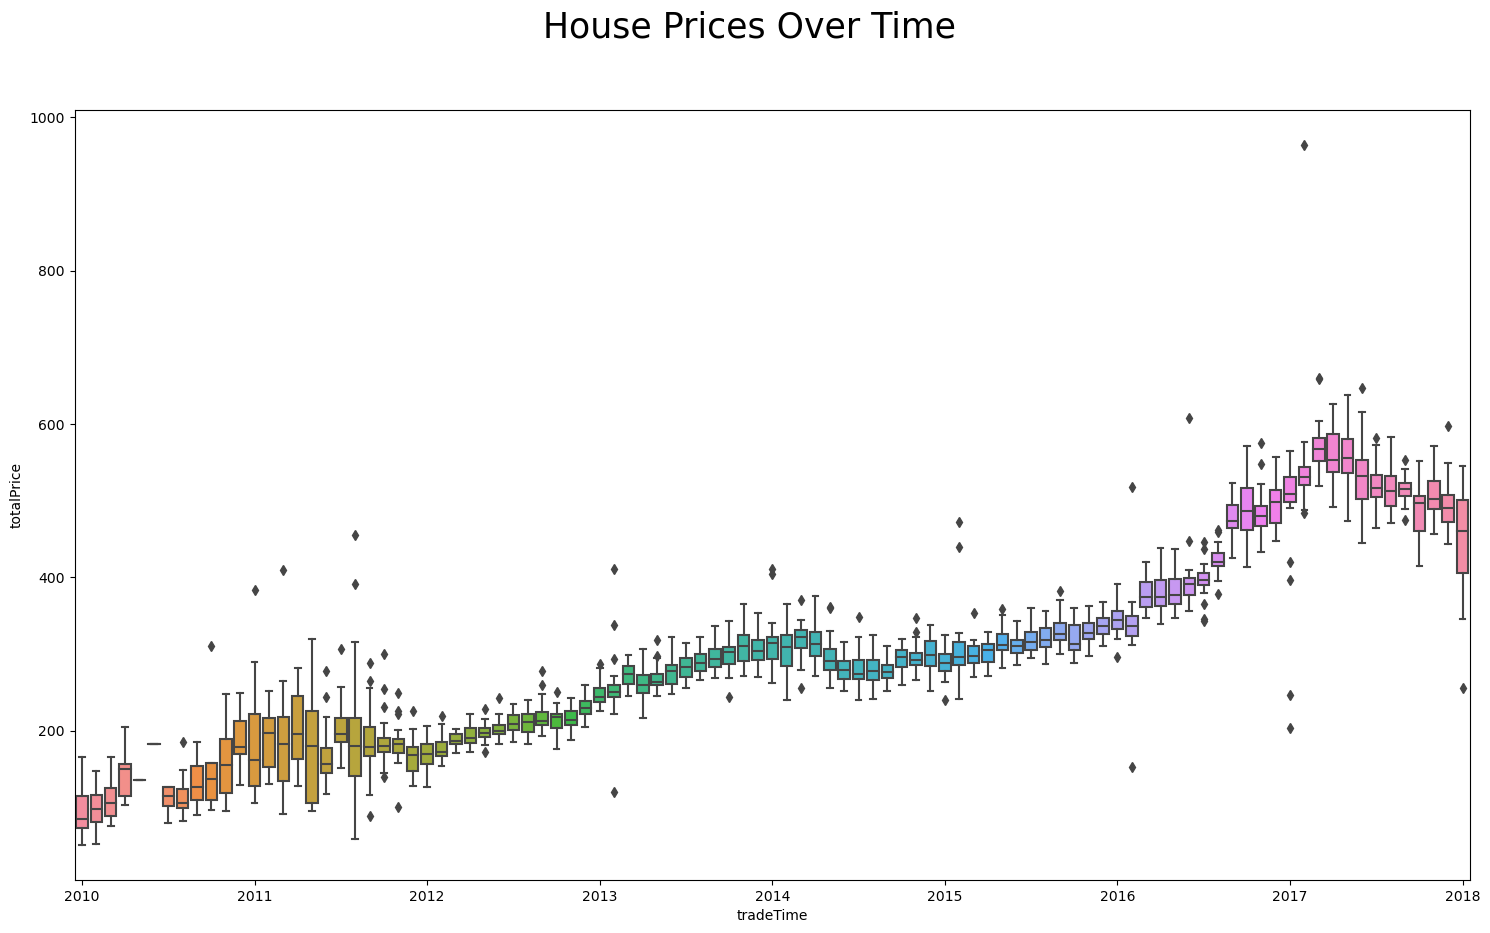

In [25]:
# Visualize House Prices over the years from 2010 onwards. The data point before 2010 are too few. 
DT = data.groupby(['tradeYear', 'tradeMonth', 'tradeDay'])['totalPrice'].mean().reset_index()

DT.drop(DT[DT['tradeYear']<2010].index, inplace=True) # this is because the years prior to 2010 have very few data points
DT['tradeTime'] = list(zip(DT.tradeYear, DT.tradeMonth))
DT.reset_index(inplace=True)

# Plot 
fig = plt.figure(figsize=(18,10))
fig.suptitle('House Prices Over Time', fontsize=25)
sns.boxplot(data=DT, x='tradeTime',y='totalPrice',  saturation=0.9)
plt.xticks(np.arange(0, len(DT['tradeTime'].unique()), 12), labels=range(2010, 2018+1))
plt.show()

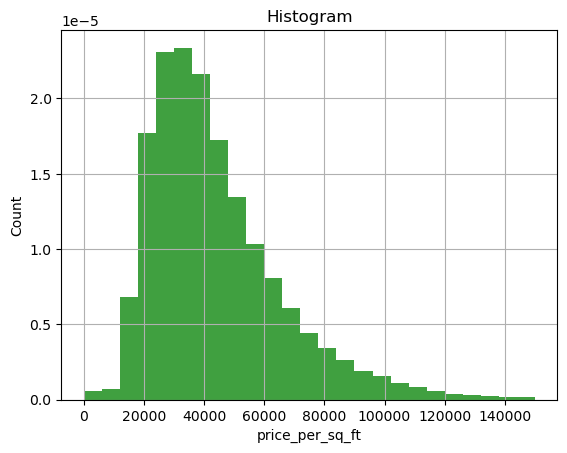

In [26]:
# Distribution of House price per squared feet
plt.hist(data.price, bins=25, density = True, color='g', alpha=0.75)

plt.xlabel("price_per_sq_ft")
plt.ylabel("Count")
plt.title("Histogram")
plt.grid(True)
plt.show()

#### Note
From the observation above most of the house fall within the price range of 20,000 to 60,000 RMB per_sq_ft. Also, the higher the price gets, the observation frequency smoothly flattens out

### 1.  Visualize categorical Variables

##### a. buildingStructure as a function of price per sqft

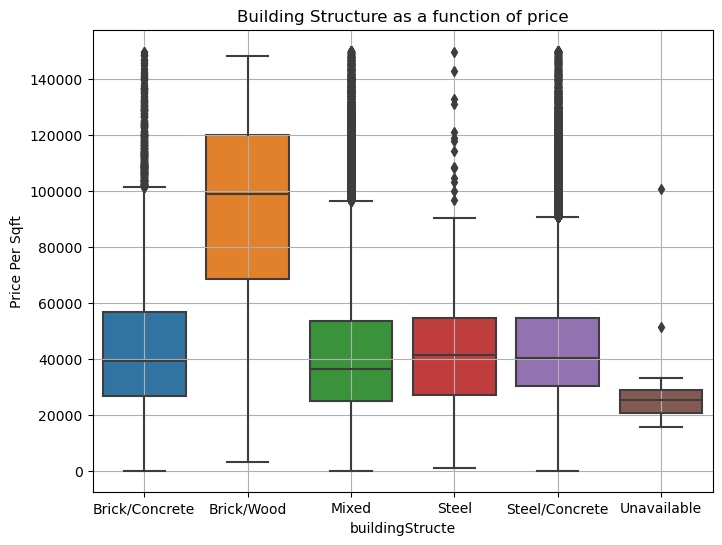

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data, x=data.buildingStructure, y=data.price, order = ["Brick/Concrete", "Brick/Wood", "Mixed", "Steel", "Steel/Concrete",
                                                                  "Unavailable"])
plt.title("Building Structure as a function of price")
plt.xlabel("buildingStructe")
plt.ylabel("Price Per Sqft")
plt.grid(visible=True)
plt.show()


#### Deductions from using building structure as a function of price per sqft
The box plots above gives a good visual representation of how the average house price fluctuates depending on the building structure.
By looking at the median value it is evident that houses build out of brick and wood are more expensive than all the other building structures. 

#### b.  RenovationCondition as a function of price per sqft

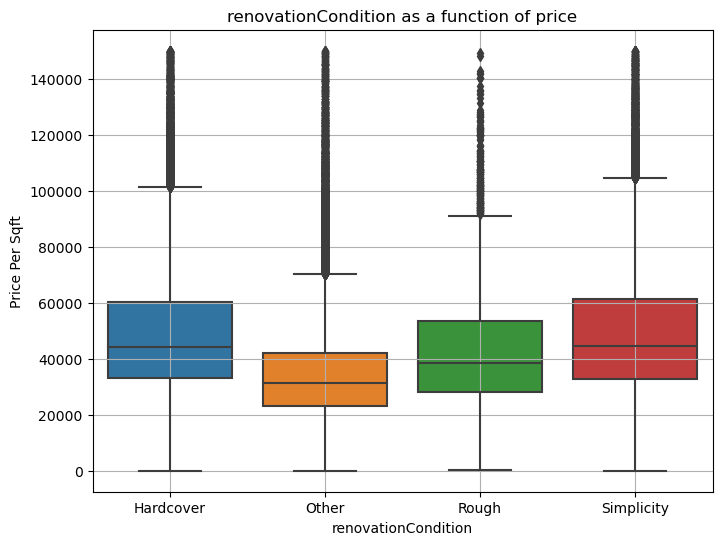

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data, x=data.renovationCondition, y=data.price, order = ["Hardcover", "Other", "Rough", "Simplicity"])
plt.title("renovationCondition as a function of price")
plt.xlabel("renovationCondition")
plt.ylabel("Price Per Sqft")
plt.grid(visible=True)
plt.show()

#### Deduction from using renovationCondition as a function of price per sqft
By looking at the boxplotst is evident that the median price least for renovationCondition other and quite similar for Hardcover, Rough, and Simplicity

#### c. Elevator as a function of price 

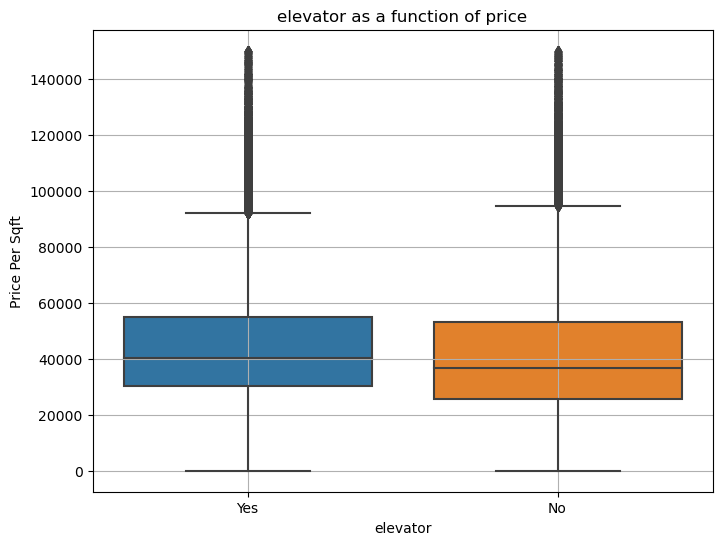

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data, x=data.elevator, y=data.price, order = ["Yes", "No"])
plt.title("elevator as a function of price")
plt.xlabel("elevator")
plt.ylabel("Price Per Sqft")
plt.grid(visible=True)
plt.show()

##### Deduction from using renovationCondition as a function of price per sqft
By looking at the boxplotst is evident that the median price for buildings with elevator is higher than those without

#### d. Subway as a function of price

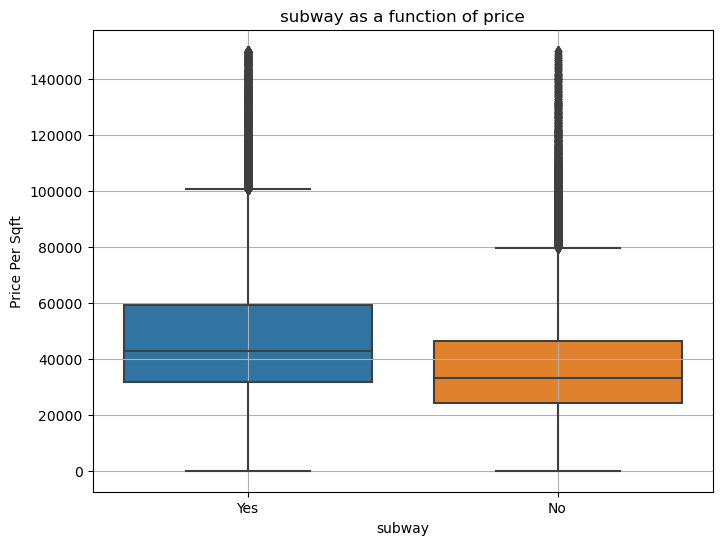

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data, x=data.subway, y=data.price, order = ["Yes", "No"])
plt.title("subway as a function of price")
plt.xlabel("subway")
plt.ylabel("Price Per Sqft")
plt.grid(visible=True)
plt.show()

###### Deduction from using subway as a function of price per sqft
By looking at the boxplotst it is evident that the median price for buildings closer to subway stations are higher 

#### e. FiveYearsProperty as a function as price

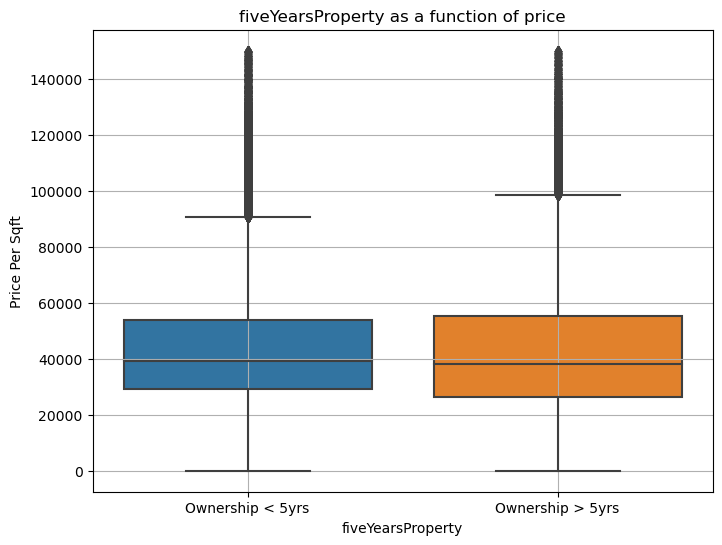

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data, x=data.fiveYearsProperty, y=data.price, order = ["Ownership < 5yrs", "Ownership > 5yrs"])
plt.title("fiveYearsProperty as a function of price")
plt.xlabel("fiveYearsProperty")
plt.ylabel("Price Per Sqft")
plt.grid(visible=True)
plt.show()

###### Deductions from using FiveYearsProperty as a function of price per sqft
By looking at the boxplotst it is evident that the median price for propertities less than 5 years is higher although only slightly

#### f. District as a function as price

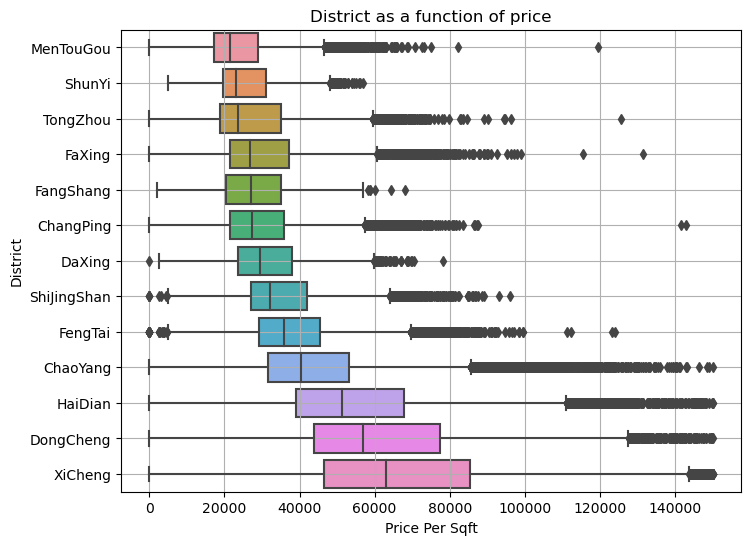

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data, x=data.price, y=data.district, order = ["MenTouGou", "ShunYi", "TongZhou", "FaXing", "FangShang", "ChangPing",  "DaXing", "ShiJingShan",
                                                          "FengTai", "ChaoYang", "HaiDian", "DongCheng", "XiCheng"], orient='h')

plt.title("District as a function of price")
plt.xlabel("Price Per Sqft")
plt.ylabel("District")
plt.grid(visible=True)
plt.show()

###### Deductions from using district as a function of price per Sqft
By looking at the boxplotst it is evident that the median price for houses is highest in XiCheng district with a median price of 
about RMB 62,000/sqft whereas the district with the least median price is MenTouGou with a median price of around RMB 22,000/sqft

### 2. Numeric Variables 

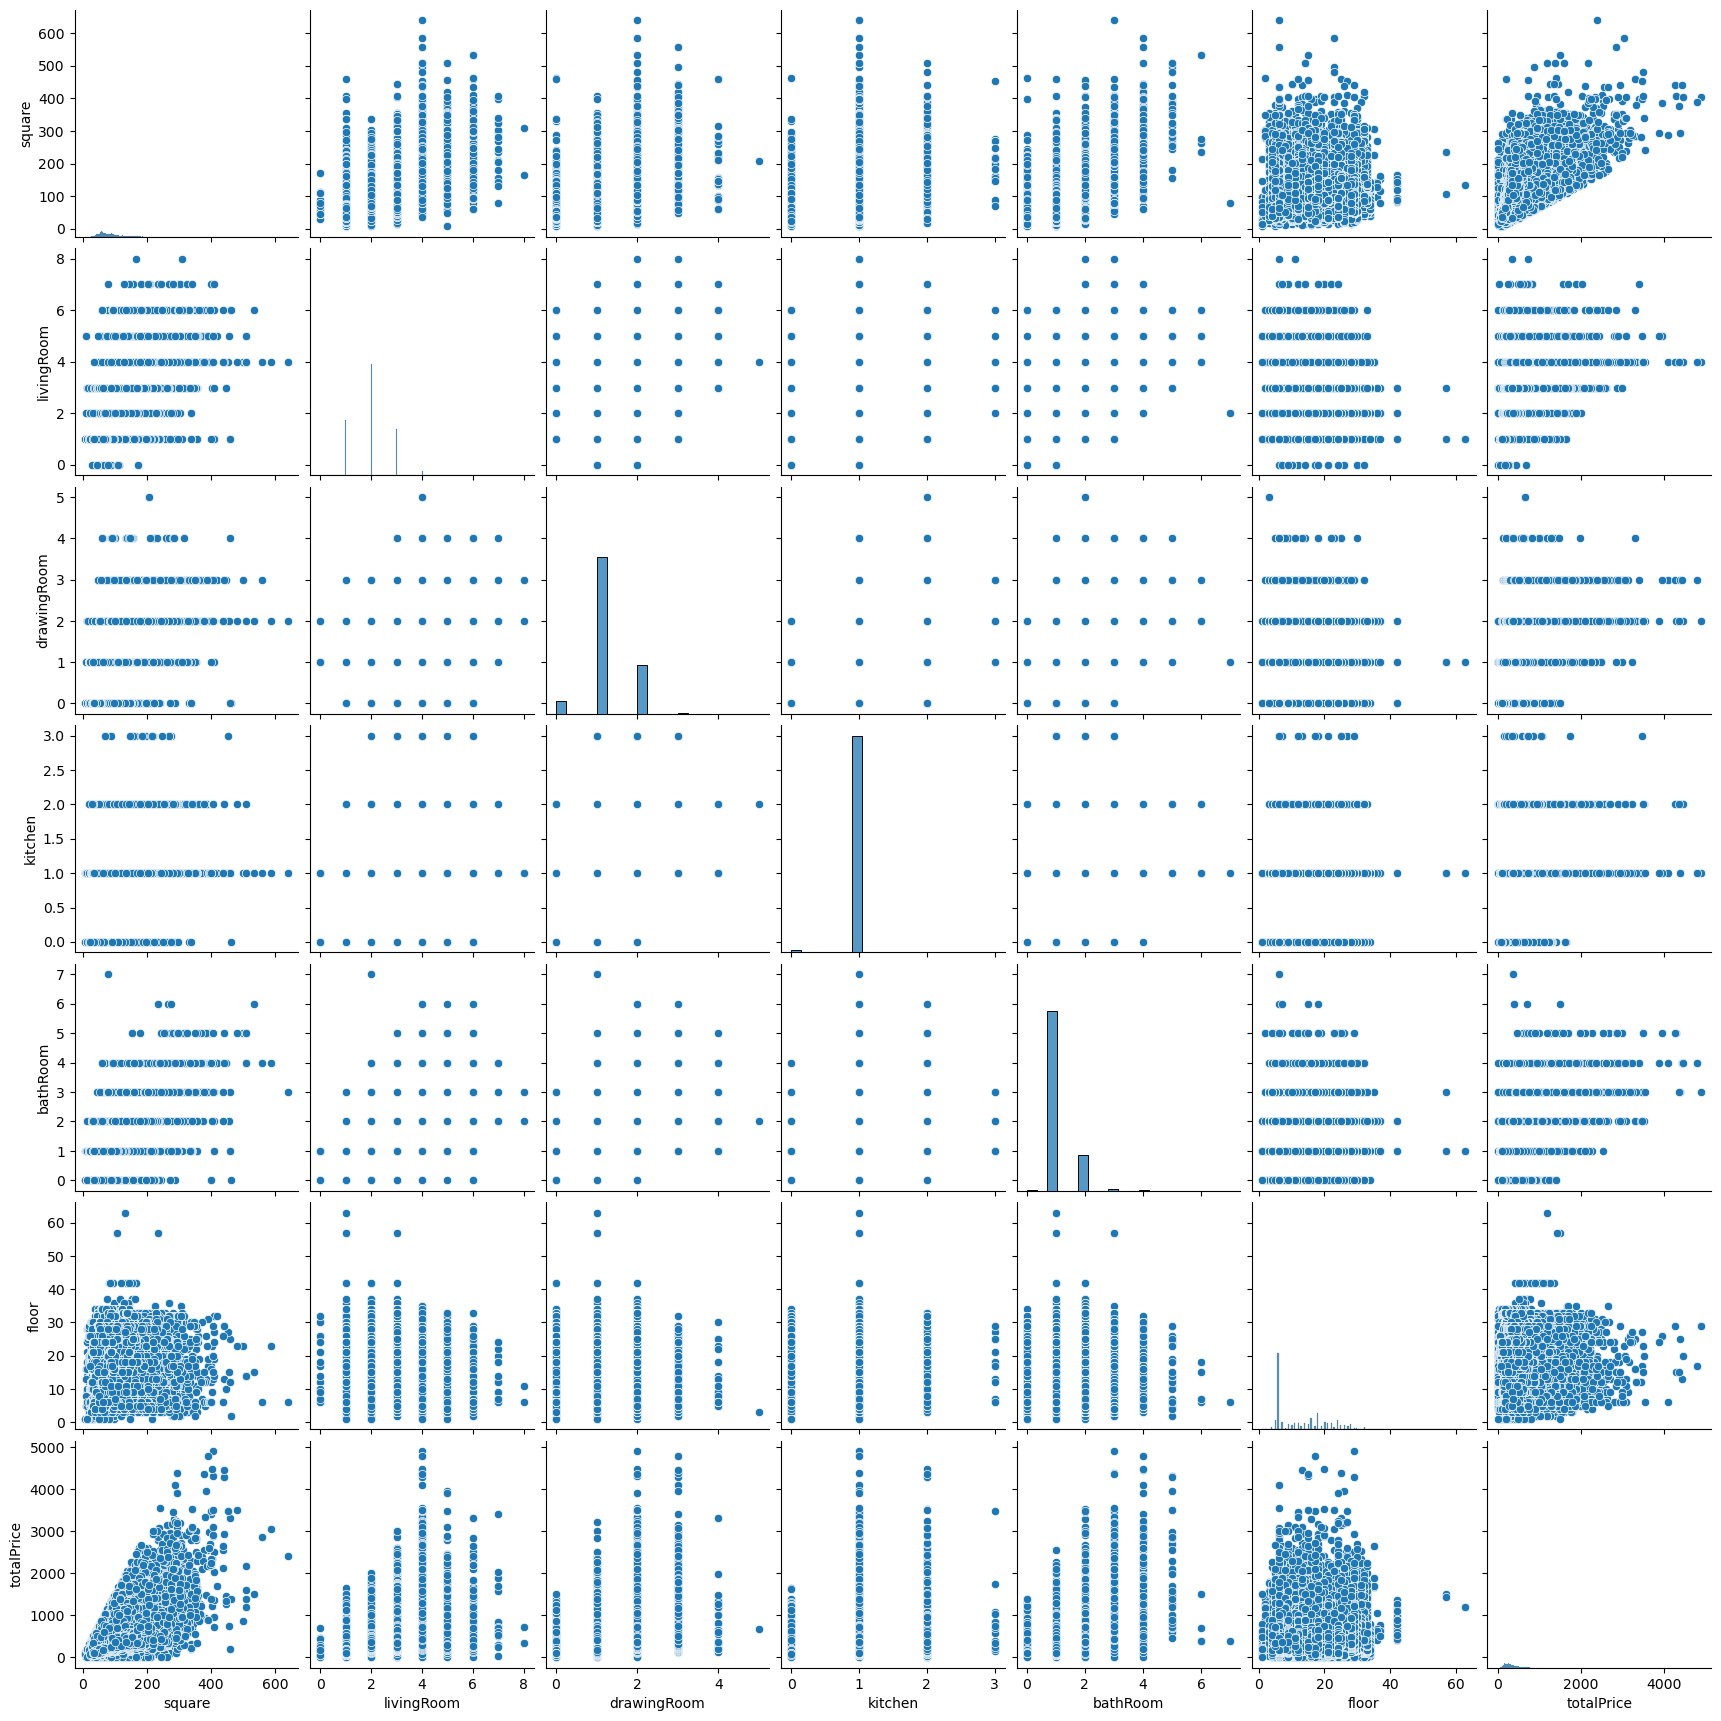

In [33]:
# Correlation plot to observe the relationship between selected numeric variables and the output 
sns.pairplot(data, x_vars=["square", "livingRoom","drawingRoom","kitchen","bathRoom","floor", "totalPrice"], y_vars=["square", "livingRoom","drawingRoom","kitchen","bathRoom","floor", "totalPrice"])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 0 to 318849
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  297701 non-null  float64
 1   Lat                  297701 non-null  float64
 2   tradeTime            297701 non-null  object 
 3   DOM                  297701 non-null  float64
 4   followers            297701 non-null  int64  
 5   totalPrice           297701 non-null  float64
 6   price                297701 non-null  int64  
 7   square               297701 non-null  float64
 8   livingRoom           297701 non-null  int64  
 9   drawingRoom          297701 non-null  int64  
 10  kitchen              297701 non-null  int64  
 11  bathRoom             297701 non-null  int64  
 12  floor                297701 non-null  int64  
 13  buildingType         297701 non-null  object 
 14  constructionTime     297701 non-null  int64  
 15  renovationConditi

## Feature Engineering 

<AxesSubplot: >

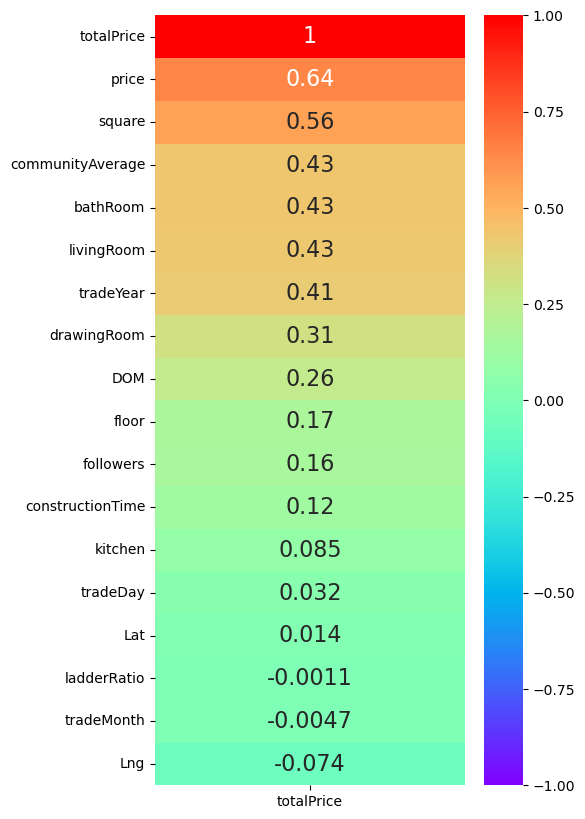

In [35]:
# Determine the correlation between the some of the input variables and the output variable totalPrice
features = data.corr()[['totalPrice']].sort_values(by=['totalPrice'], ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [36]:
# Features such as ladder ratio, Lng, Lat have very low correlation with the predicted totalPrice and can de deleted
data = data.drop(['Lng','Lat','ladderRatio'], axis=1) # low correlation 
data = data.drop(['tradeMonth','tradeDay','tradeYear'], axis=1) # initially added to the data for visualization purpose
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage,floortype
0,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,...,Tower,2005,Simplicity,Steel/Concrete,Yes,Ownership > 5yrs,Yes,ChaoYang,56021.0,High
1,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,...,Tower,2004,Hardcover,Steel/Concrete,Yes,Ownership < 5yrs,No,ChaoYang,71539.0,High
2,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,...,Plate,2005,Simplicity,Steel/Concrete,Yes,Ownership > 5yrs,No,ChaoYang,48160.0,Medium
3,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,Tower,2008,Other,Steel/Concrete,Yes,Ownership > 5yrs,No,ChangPing,51238.0,Groundlevel
4,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,...,Plate,1960,Rough,Mixed,No,Ownership < 5yrs,Yes,DongCheng,62588.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318845,2016-06-09,1.0,8,355.5,26491,134.20,3,2,1,2,...,Plate/Tower,2009,Hardcover,Steel/Concrete,Yes,Ownership < 5yrs,No,DaXing,36545.0,Medium
318846,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,...,Plate,2003,Other,Steel/Concrete,No,Ownership < 5yrs,No,DaXing,36545.0,Medium
318847,2016-06-10,6.0,1,108.8,31006,35.09,1,0,1,1,...,Tower,2009,Other,Steel/Concrete,Yes,Ownership > 5yrs,Yes,DaXing,54282.0,Medium
318848,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,...,Plate,2000,Simplicity,Steel/Concrete,Yes,Ownership < 5yrs,No,DaXing,46927.0,Medium


### Outlier Removal

In [37]:
data.price.describe()

count    297701.000000
mean      43820.549521
std       21789.623587
min           1.000000
25%       28224.000000
50%       39033.000000
75%       54249.000000
max      150000.000000
Name: price, dtype: float64

#### From the above we establish that the minimum price per sqft 1RM/sqft and the maximum price is 150000RMB/sqft. This indicates a very large range. Outlier removal will be performed here for every district using mean three standard deviation.

In [38]:
# Create a function for outlier removal using district 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('district'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-(3*st))) & (subdf.price<=(m+(3*st)))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [39]:
# remove outliers from the data 
data = remove_pps_outliers(data)
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage,floortype
0,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,Tower,2008,Other,Steel/Concrete,Yes,Ownership > 5yrs,No,ChangPing,51238.0,Groundlevel
1,2016-09-08,603.0,19,354.5,50672,69.96,3,1,1,2,...,Plate/Tower,2010,Other,Steel/Concrete,Yes,Ownership > 5yrs,Yes,ChangPing,45854.0,Medium
2,2016-07-22,507.0,27,224.5,19026,118.00,2,2,1,2,...,Plate,1998,Simplicity,Mixed,No,Ownership < 5yrs,No,ChangPing,38062.0,Rooftop
3,2016-09-04,539.0,41,240.0,28784,83.38,1,1,1,1,...,Tower,2009,Simplicity,Steel/Concrete,Yes,Ownership > 5yrs,Yes,ChangPing,41887.0,Medium
4,2016-07-31,494.0,59,190.0,31240,60.82,1,1,1,1,...,Tower,2004,Simplicity,Steel/Concrete,Yes,Ownership < 5yrs,Yes,ChangPing,43211.0,Rooftop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,134.0,23341,57.41,2,1,1,1,...,Plate,1994,Other,Mixed,No,Ownership < 5yrs,No,XiCheng,86953.0,Low
295641,2011-11-13,6.0,0,737.3,43217,170.60,4,3,1,2,...,Plate/Tower,2011,Other,Steel/Concrete,Yes,Ownership > 5yrs,Yes,XiCheng,143667.0,Medium
295642,2012-02-20,6.0,0,226.0,28145,80.30,2,1,1,1,...,Plate,1997,Other,Mixed,No,Ownership < 5yrs,Yes,XiCheng,79432.0,Medium
295643,2011-12-01,6.0,0,260.0,26794,97.04,2,1,1,1,...,Tower,1999,Other,Steel/Concrete,Yes,Ownership > 5yrs,No,XiCheng,80133.0,High


Text(0, 0.5, 'Count')

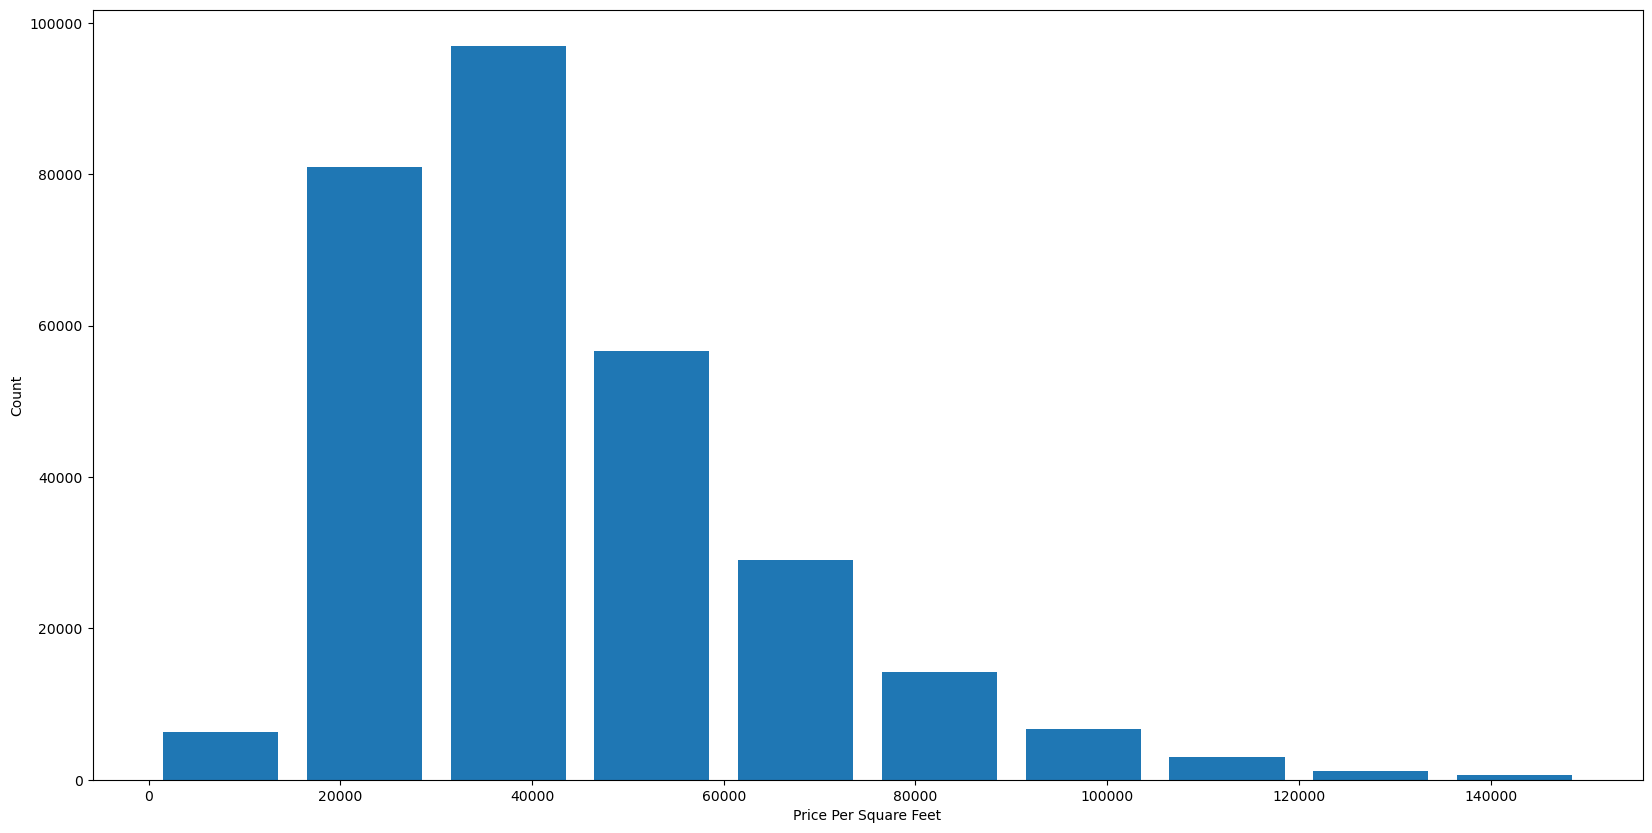

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data.price,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## One Hot Encoding

In [41]:
# Elevator Variable 
dummies_elevator = pd.get_dummies(data.elevator)
dummies_elevator.head(10)

,No,Yes
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


In [42]:
data = pd.concat([data, dummies_elevator.drop('No', axis='columns')], axis='columns')
data['elevator'] = data['Yes']
data=data.drop('Yes', axis='columns')
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage,floortype
0,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,Tower,2008,Other,Steel/Concrete,1,Ownership > 5yrs,No,ChangPing,51238.0,Groundlevel
1,2016-09-08,603.0,19,354.5,50672,69.96,3,1,1,2,...,Plate/Tower,2010,Other,Steel/Concrete,1,Ownership > 5yrs,Yes,ChangPing,45854.0,Medium
2,2016-07-22,507.0,27,224.5,19026,118.00,2,2,1,2,...,Plate,1998,Simplicity,Mixed,0,Ownership < 5yrs,No,ChangPing,38062.0,Rooftop
3,2016-09-04,539.0,41,240.0,28784,83.38,1,1,1,1,...,Tower,2009,Simplicity,Steel/Concrete,1,Ownership > 5yrs,Yes,ChangPing,41887.0,Medium
4,2016-07-31,494.0,59,190.0,31240,60.82,1,1,1,1,...,Tower,2004,Simplicity,Steel/Concrete,1,Ownership < 5yrs,Yes,ChangPing,43211.0,Rooftop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,134.0,23341,57.41,2,1,1,1,...,Plate,1994,Other,Mixed,0,Ownership < 5yrs,No,XiCheng,86953.0,Low
295641,2011-11-13,6.0,0,737.3,43217,170.60,4,3,1,2,...,Plate/Tower,2011,Other,Steel/Concrete,1,Ownership > 5yrs,Yes,XiCheng,143667.0,Medium
295642,2012-02-20,6.0,0,226.0,28145,80.30,2,1,1,1,...,Plate,1997,Other,Mixed,0,Ownership < 5yrs,Yes,XiCheng,79432.0,Medium
295643,2011-12-01,6.0,0,260.0,26794,97.04,2,1,1,1,...,Tower,1999,Other,Steel/Concrete,1,Ownership > 5yrs,No,XiCheng,80133.0,High


In [43]:
# fiveYearsProperty 
dummies_fiveYearsProperty = pd.get_dummies(data.fiveYearsProperty)
dummies_fiveYearsProperty.head(10)

,Ownership < 5yrs,Ownership > 5yrs
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [44]:
data = pd.concat([data, dummies_fiveYearsProperty.drop('Ownership < 5yrs', axis='columns')], axis='columns')
data['fiveYearsProperty'] = data['Ownership > 5yrs']
data=data.drop('Ownership > 5yrs', axis='columns')
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage,floortype
0,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,Tower,2008,Other,Steel/Concrete,1,1,No,ChangPing,51238.0,Groundlevel
1,2016-09-08,603.0,19,354.5,50672,69.96,3,1,1,2,...,Plate/Tower,2010,Other,Steel/Concrete,1,1,Yes,ChangPing,45854.0,Medium
2,2016-07-22,507.0,27,224.5,19026,118.00,2,2,1,2,...,Plate,1998,Simplicity,Mixed,0,0,No,ChangPing,38062.0,Rooftop
3,2016-09-04,539.0,41,240.0,28784,83.38,1,1,1,1,...,Tower,2009,Simplicity,Steel/Concrete,1,1,Yes,ChangPing,41887.0,Medium
4,2016-07-31,494.0,59,190.0,31240,60.82,1,1,1,1,...,Tower,2004,Simplicity,Steel/Concrete,1,0,Yes,ChangPing,43211.0,Rooftop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,134.0,23341,57.41,2,1,1,1,...,Plate,1994,Other,Mixed,0,0,No,XiCheng,86953.0,Low
295641,2011-11-13,6.0,0,737.3,43217,170.60,4,3,1,2,...,Plate/Tower,2011,Other,Steel/Concrete,1,1,Yes,XiCheng,143667.0,Medium
295642,2012-02-20,6.0,0,226.0,28145,80.30,2,1,1,1,...,Plate,1997,Other,Mixed,0,0,Yes,XiCheng,79432.0,Medium
295643,2011-12-01,6.0,0,260.0,26794,97.04,2,1,1,1,...,Tower,1999,Other,Steel/Concrete,1,1,No,XiCheng,80133.0,High


In [45]:
# subway
dummies_subway = pd.get_dummies(data.subway)
dummies_subway.head(10)

,No,Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [46]:
data = pd.concat([data, dummies_subway.drop('No', axis='columns')], axis='columns')
data['subway'] = data['Yes']
data=data.drop('Yes', axis='columns')
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district,communityAverage,floortype
0,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,Tower,2008,Other,Steel/Concrete,1,1,0,ChangPing,51238.0,Groundlevel
1,2016-09-08,603.0,19,354.5,50672,69.96,3,1,1,2,...,Plate/Tower,2010,Other,Steel/Concrete,1,1,1,ChangPing,45854.0,Medium
2,2016-07-22,507.0,27,224.5,19026,118.00,2,2,1,2,...,Plate,1998,Simplicity,Mixed,0,0,0,ChangPing,38062.0,Rooftop
3,2016-09-04,539.0,41,240.0,28784,83.38,1,1,1,1,...,Tower,2009,Simplicity,Steel/Concrete,1,1,1,ChangPing,41887.0,Medium
4,2016-07-31,494.0,59,190.0,31240,60.82,1,1,1,1,...,Tower,2004,Simplicity,Steel/Concrete,1,0,1,ChangPing,43211.0,Rooftop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,134.0,23341,57.41,2,1,1,1,...,Plate,1994,Other,Mixed,0,0,0,XiCheng,86953.0,Low
295641,2011-11-13,6.0,0,737.3,43217,170.60,4,3,1,2,...,Plate/Tower,2011,Other,Steel/Concrete,1,1,1,XiCheng,143667.0,Medium
295642,2012-02-20,6.0,0,226.0,28145,80.30,2,1,1,1,...,Plate,1997,Other,Mixed,0,0,1,XiCheng,79432.0,Medium
295643,2011-12-01,6.0,0,260.0,26794,97.04,2,1,1,1,...,Tower,1999,Other,Steel/Concrete,1,1,0,XiCheng,80133.0,High


In [47]:
# floortype encoding
dummies_floortype = pd.get_dummies(data.floortype)
dummies_floortype.head(10)

,Groundlevel,High,Low,Medium,NA,Rooftop
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,1,0,0
7,0,0,0,0,0,1
8,0,1,0,0,0,0
9,0,0,0,0,0,1


In [48]:
#drop the column NA
data = pd.concat([data, dummies_floortype.drop('NA', axis='columns')], axis='columns') # drop NA for flooor dummies
data =data.drop('floortype', axis=1) # drop column floortype 
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,elevator,fiveYearsProperty,subway,district,communityAverage,Groundlevel,High,Low,Medium,Rooftop
0,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,1,1,0,ChangPing,51238.0,1,0,0,0,0
1,2016-09-08,603.0,19,354.5,50672,69.96,3,1,1,2,...,1,1,1,ChangPing,45854.0,0,0,0,1,0
2,2016-07-22,507.0,27,224.5,19026,118.00,2,2,1,2,...,0,0,0,ChangPing,38062.0,0,0,0,0,1
3,2016-09-04,539.0,41,240.0,28784,83.38,1,1,1,1,...,1,1,1,ChangPing,41887.0,0,0,0,1,0
4,2016-07-31,494.0,59,190.0,31240,60.82,1,1,1,1,...,1,0,1,ChangPing,43211.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,134.0,23341,57.41,2,1,1,1,...,0,0,0,XiCheng,86953.0,0,0,1,0,0
295641,2011-11-13,6.0,0,737.3,43217,170.60,4,3,1,2,...,1,1,1,XiCheng,143667.0,0,0,0,1,0
295642,2012-02-20,6.0,0,226.0,28145,80.30,2,1,1,1,...,0,0,1,XiCheng,79432.0,0,0,0,1,0
295643,2011-12-01,6.0,0,260.0,26794,97.04,2,1,1,1,...,1,1,0,XiCheng,80133.0,0,1,0,0,0


In [49]:
# buildingType encoding
dummies_buildingType = pd.get_dummies(data.buildingType)
dummies_buildingType.head(10)

,Bungalow,Plate,Plate/Tower,Tower
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [50]:
#drop the column Bungalow
data = pd.concat([data, dummies_buildingType.drop('Bungalow', axis='columns')], axis='columns') # drop NA for flooor dummies
data =data.drop('buildingType', axis=1) # drop column buildingType from the data
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,district,communityAverage,Groundlevel,High,Low,Medium,Rooftop,Plate,Plate/Tower,Tower
0,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,ChangPing,51238.0,1,0,0,0,0,0,0,1
1,2016-09-08,603.0,19,354.5,50672,69.96,3,1,1,2,...,ChangPing,45854.0,0,0,0,1,0,0,1,0
2,2016-07-22,507.0,27,224.5,19026,118.00,2,2,1,2,...,ChangPing,38062.0,0,0,0,0,1,1,0,0
3,2016-09-04,539.0,41,240.0,28784,83.38,1,1,1,1,...,ChangPing,41887.0,0,0,0,1,0,0,0,1
4,2016-07-31,494.0,59,190.0,31240,60.82,1,1,1,1,...,ChangPing,43211.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,134.0,23341,57.41,2,1,1,1,...,XiCheng,86953.0,0,0,1,0,0,1,0,0
295641,2011-11-13,6.0,0,737.3,43217,170.60,4,3,1,2,...,XiCheng,143667.0,0,0,0,1,0,0,1,0
295642,2012-02-20,6.0,0,226.0,28145,80.30,2,1,1,1,...,XiCheng,79432.0,0,0,0,1,0,1,0,0
295643,2011-12-01,6.0,0,260.0,26794,97.04,2,1,1,1,...,XiCheng,80133.0,0,1,0,0,0,0,0,1


In [51]:
# Encoding for district 
dummies_district = pd.get_dummies(data.district)
dummies_district.head(10)

,ChangPing,ChaoYang,DaXing,DongCheng,FaXing,FangShang,FengTai,HaiDian,MenTouGou,ShiJingShan,ShunYi,TongZhou,XiCheng
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
data = pd.concat([data, dummies_district], axis='columns')
data = data.drop(['district'], axis="columns")
data

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,DongCheng,FaXing,FangShang,FengTai,HaiDian,MenTouGou,ShiJingShan,ShunYi,TongZhou,XiCheng
0,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-09-08,603.0,19,354.5,50672,69.96,3,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2016-07-22,507.0,27,224.5,19026,118.00,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
3,2016-09-04,539.0,41,240.0,28784,83.38,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2016-07-31,494.0,59,190.0,31240,60.82,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,134.0,23341,57.41,2,1,1,1,...,0,0,0,0,0,0,0,0,0,1
295641,2011-11-13,6.0,0,737.3,43217,170.60,4,3,1,2,...,0,0,0,0,0,0,0,0,0,1
295642,2012-02-20,6.0,0,226.0,28145,80.30,2,1,1,1,...,0,0,0,0,0,0,0,0,0,1
295643,2011-12-01,6.0,0,260.0,26794,97.04,2,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295645 entries, 0 to 295644
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tradeTime            295645 non-null  object 
 1   DOM                  295645 non-null  float64
 2   followers            295645 non-null  int64  
 3   totalPrice           295645 non-null  float64
 4   price                295645 non-null  int64  
 5   square               295645 non-null  float64
 6   livingRoom           295645 non-null  int64  
 7   drawingRoom          295645 non-null  int64  
 8   kitchen              295645 non-null  int64  
 9   bathRoom             295645 non-null  int64  
 10  floor                295645 non-null  int64  
 11  constructionTime     295645 non-null  int64  
 12  renovationCondition  295645 non-null  object 
 13  buildingStructure    295645 non-null  object 
 14  elevator             295645 non-null  uint8  
 15  fiveYearsProperty

### Processing data for time series forecasting 

In [54]:
# Before we being processing the data for time series forecasting, first drop price since the aim is to use totalPrice as 
# the output and not price per sqft. 
data = data.drop('price', axis=1)
data['TotalPrice'] = data['totalPrice']
data=data.drop('totalPrice', axis=1)
data

,tradeTime,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,...,FaXing,FangShang,FengTai,HaiDian,MenTouGou,ShiJingShan,ShunYi,TongZhou,XiCheng,TotalPrice
0,2016-09-30,965.0,138,134.00,3,1,1,1,21,2008,...,0,0,0,0,0,0,0,0,0,297.5
1,2016-09-08,603.0,19,69.96,3,1,1,2,11,2010,...,0,0,0,0,0,0,0,0,0,354.5
2,2016-07-22,507.0,27,118.00,2,2,1,2,6,1998,...,0,0,0,0,0,0,0,0,0,224.5
3,2016-09-04,539.0,41,83.38,1,1,1,1,15,2009,...,0,0,0,0,0,0,0,0,0,240.0
4,2016-07-31,494.0,59,60.82,1,1,1,1,19,2004,...,0,0,0,0,0,0,0,0,0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295640,2012-02-05,6.0,0,57.41,2,1,1,1,6,1994,...,0,0,0,0,0,0,0,0,1,134.0
295641,2011-11-13,6.0,0,170.60,4,3,1,2,20,2011,...,0,0,0,0,0,0,0,0,1,737.3
295642,2012-02-20,6.0,0,80.30,2,1,1,1,6,1997,...,0,0,0,0,0,0,0,0,1,226.0
295643,2011-12-01,6.0,0,97.04,2,1,1,1,23,1999,...,0,0,0,0,0,0,0,0,1,260.0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295645 entries, 0 to 295644
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tradeTime            295645 non-null  object 
 1   DOM                  295645 non-null  float64
 2   followers            295645 non-null  int64  
 3   square               295645 non-null  float64
 4   livingRoom           295645 non-null  int64  
 5   drawingRoom          295645 non-null  int64  
 6   kitchen              295645 non-null  int64  
 7   bathRoom             295645 non-null  int64  
 8   floor                295645 non-null  int64  
 9   constructionTime     295645 non-null  int64  
 10  renovationCondition  295645 non-null  object 
 11  buildingStructure    295645 non-null  object 
 12  elevator             295645 non-null  uint8  
 13  fiveYearsProperty    295645 non-null  uint8  
 14  subway               295645 non-null  uint8  
 15  communityAverage 

In [56]:
# Convert datetime from object to datetime type 
data['tradeTime'] = pd.to_datetime(data['tradeTime'])

# sort data from earliest to the latest date
data = data.sort_values(by='tradeTime')

#set datetime as index
data = data.set_index(data.tradeTime)

# drop tradetime column 
data.drop('tradeTime', axis=1, inplace=True)

# Create Day, month, Year variables 
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year

In [57]:
data

,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,...,HaiDian,MenTouGou,ShiJingShan,ShunYi,TongZhou,XiCheng,TotalPrice,day,month,year
tradeTime,,,,,,,,,,,,,,,,,,,,,
2016-09-30,965.0,138,134.00,3,1,1,1,21,2008,Other,...,0,0,0,0,0,0,297.5,30,9,2016
2016-09-08,603.0,19,69.96,3,1,1,2,11,2010,Other,...,0,0,0,0,0,0,354.5,8,9,2016
2016-07-22,507.0,27,118.00,2,2,1,2,6,1998,Simplicity,...,0,0,0,0,0,0,224.5,22,7,2016
2016-09-04,539.0,41,83.38,1,1,1,1,15,2009,Simplicity,...,0,0,0,0,0,0,240.0,4,9,2016
2016-07-31,494.0,59,60.82,1,1,1,1,19,2004,Simplicity,...,0,0,0,0,0,0,190.0,31,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-05,6.0,0,57.41,2,1,1,1,6,1994,Other,...,0,0,0,0,0,1,134.0,5,2,2012
2011-11-13,6.0,0,170.60,4,3,1,2,20,2011,Other,...,0,0,0,0,0,1,737.3,13,11,2011
2012-02-20,6.0,0,80.30,2,1,1,1,6,1997,Other,...,0,0,0,0,0,1,226.0,20,2,2012


In [58]:
data = data.sort_values(by='tradeTime')
data

,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,...,HaiDian,MenTouGou,ShiJingShan,ShunYi,TongZhou,XiCheng,TotalPrice,day,month,year
tradeTime,,,,,,,,,,,,,,,,,,,,,
2002-06-01,6.0,0,89.43,2,2,1,1,9,2009,Other,...,0,0,0,0,0,0,152.5,1,6,2002
2002-07-06,6.0,0,120.19,3,1,1,1,26,2002,Other,...,0,0,0,0,0,0,325.0,6,7,2002
2002-07-10,6.0,0,130.90,3,1,1,2,21,2001,Other,...,0,0,0,0,0,0,186.0,10,7,2002
2003-07-31,6.0,0,59.69,2,1,1,1,28,2005,Other,...,0,0,0,0,0,0,160.7,31,7,2003
2009-01-11,6.0,0,55.63,2,1,1,1,6,1992,Other,...,0,0,0,0,0,1,150.0,11,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-22,98.0,112,162.44,4,2,1,2,8,2009,Hardcover,...,1,0,0,0,0,0,830.0,22,1,2018
2018-01-22,152.0,98,70.08,2,1,1,1,22,2010,Hardcover,...,0,0,0,0,0,0,261.0,22,1,2018
2018-01-24,96.0,1,60.40,2,1,1,1,6,1986,Simplicity,...,1,0,0,0,0,0,460.0,24,1,2018


In [59]:
data = data.drop(data.index[[0,1,2,3]])
data

,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,...,HaiDian,MenTouGou,ShiJingShan,ShunYi,TongZhou,XiCheng,TotalPrice,day,month,year
tradeTime,,,,,,,,,,,,,,,,,,,,,
2009-01-11,6.0,0,55.63,2,1,1,1,6,1992,Other,...,0,0,0,0,0,1,150.0,11,1,2009
2010-01-01,1.0,0,120.45,3,1,0,1,12,2008,Hardcover,...,0,0,0,1,0,0,165.0,1,1,2010
2010-01-05,1.0,0,68.75,2,1,0,1,6,1998,Simplicity,...,0,0,0,1,0,0,72.5,5,1,2010
2010-01-15,1.0,0,89.94,2,1,0,1,6,2003,Simplicity,...,0,0,0,1,0,0,114.0,15,1,2010
2010-01-16,1.0,0,71.73,1,1,0,1,11,2005,Simplicity,...,0,0,0,1,0,0,84.0,16,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-22,98.0,112,162.44,4,2,1,2,8,2009,Hardcover,...,1,0,0,0,0,0,830.0,22,1,2018
2018-01-22,152.0,98,70.08,2,1,1,1,22,2010,Hardcover,...,0,0,0,0,0,0,261.0,22,1,2018
2018-01-24,96.0,1,60.40,2,1,1,1,6,1986,Simplicity,...,1,0,0,0,0,0,460.0,24,1,2018


In [60]:
data = data.drop(['buildingStructure'], axis=1)
data = data.drop(['renovationCondition'], axis=1)

### Custom function for training Gradient Boosting Machine model for House price prediction 

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(n_estimators = 6000, eta=0.1)

In [62]:
X = data.drop('TotalPrice', axis=1)
y = data['TotalPrice']
horizon =1800

# take the last horizon days for validation
X_train, X_test = X.iloc[:-horizon, :], X.iloc[-horizon:, :]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
    
# Estabilish, train, and visualize the model
model=xgb_regressor.fit(X_train, y_train)
predictions = model.predict(X_test)

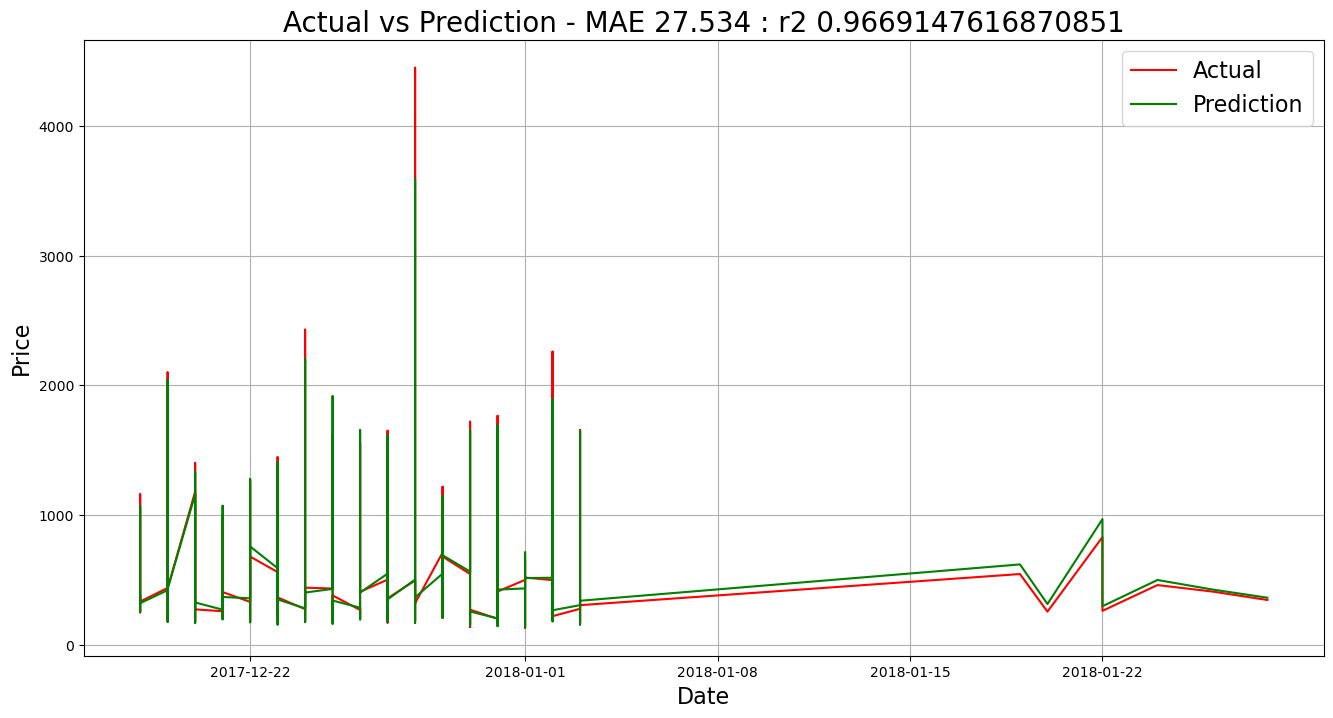

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score
# Calculate the model performance using MAE
mae = np.round(mean_absolute_error(y_test, predictions), 3) 
r2 = r2_score(y_test, predictions)
    
#plot actual vs prediction results for the last 240 days of the dataset
fig = plt.figure(figsize=(16,8))
plt.title(f'Actual vs Prediction - MAE {mae} : r2 {r2}', fontsize=20)
plt.plot(y_test, color='red')
plt.plot(pd.Series(predictions, index=y_test.index), color='green')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(labels=['Actual', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

In [64]:
# The model obtained an MAE value of 31.029 and a r-square value of 0.961. Both of this performance scores are quite impressive.

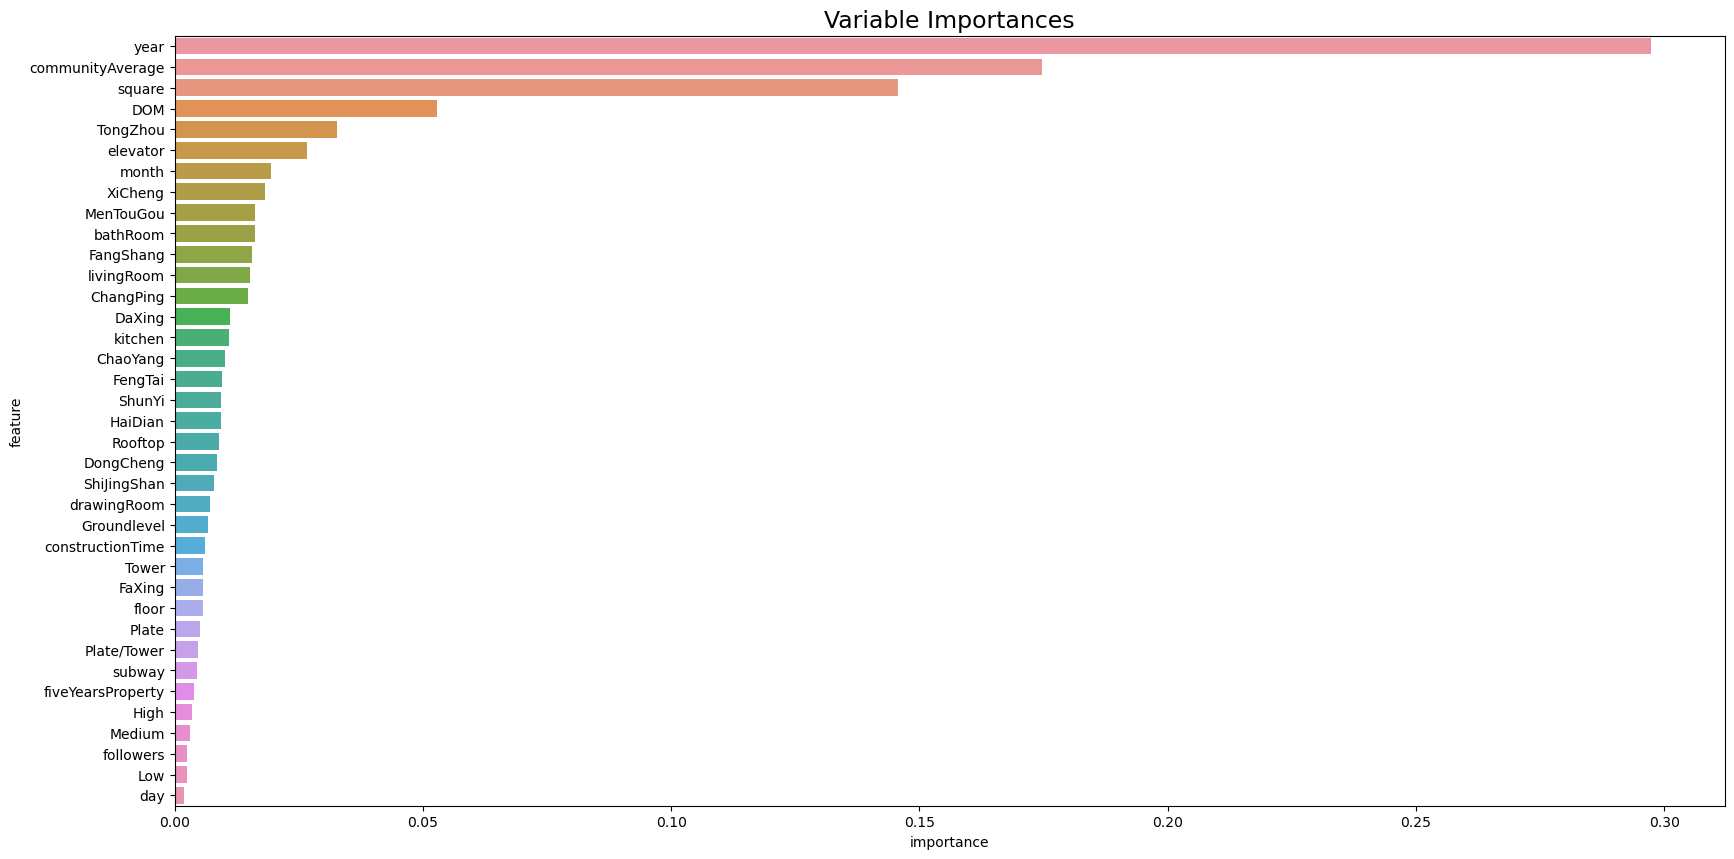

In [65]:
# create a dataframe with the variable importances of the model
data_importances = pd.DataFrame({
    'feature': model.feature_names_in_,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

#plot variable importances of the trained model
plt.title('Variable Importances', fontsize=17)
sns.barplot(x=data_importances.importance, y = data_importances.feature, orient='h')
plt.show()

In [66]:
# From the above it is obvious that 4 features year, communityAverage, square, and DOM are the most important variables of the
# trained model
# It is evident that the year and month variable created in this work does infact highly influnce the model prediction  

### Comparisons

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as ltb


DT = DecisionTreeRegressor()
RF = RandomForestRegressor(n_estimators = 6000)
GBM = GradientBoostingRegressor(n_estimators = 6000, learning_rate=0.1)
lbgm = ltb.LGBMRegressor(n_estimators = 6000, eta=0.1)
xgb = xgb.XGBRegressor(n_estimators = 6000, eta=0.1)

In [68]:
models = {
    'DT': DT,
    'GBM' : GBM,
    'lbgm' : lbgm,
    'xgb' : xgb
}

In [69]:
def train(X_train, y_train):
    mfit = {model: models[model].fit(X_train, y_train) for model in models.keys()}
    score = {model: models[model].score for model in models.keys()}
    print(score)

In [70]:
answer = pd.DataFrame()
def derive_positions(X_test):
    
    for model in models.keys():
        answer['pre'+model] = models[model].predict(X_test)

In [71]:
train(X_train, y_train)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
{'DT': <bound method RegressorMixin.score of DecisionTreeRegressor()>, 'GBM': <bound method RegressorMixin.score of GradientBoostingRegressor(n_estimators=6000)>, 'lbgm': <bound method RegressorMixin.score of LGBMRegressor(eta=0.1, n_estimators=6000)>, 'xgb': <bound method RegressorMixin.score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=

In [72]:
derive_positions(X_test)

### Evaluation of comparative models 

In [73]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
effect = pd.DataFrame(columns = ['model','MSE','MAE','RMSE','R2'])
i = 0
for k,v in models.items():
    y_predict = answer['pre'+k]
    MSE = mean_squared_error(y_test,y_predict)
    MAE = mean_absolute_error(y_test,y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test,y_predict))  
    R2 = r2_score(y_test,y_predict)
    effect.loc[i] = [k,MSE,MAE,RMSE,R2]
    i += 1
    print(f"MSE:{MSE}MAE:{MAE}RMSE:{RMSE}R2:{R2}")
effect

MSE:8748.966805555556MAE:49.627833333333335RMSE:93.53591184970378R2:0.8630739961348676
MSE:2581.1378593941627MAE:31.396397700988526RMSE:50.80489995457291R2:0.9596038137569088
MSE:3162.287982711066MAE:28.14100074010455RMSE:56.234224300785606R2:0.9505085038991798
MSE:2114.0005812095196MAE:27.5339523179796RMSE:45.97826205077264R2:0.9669147616870851


,model,MSE,MAE,RMSE,R2
0,DT,8748.966806,49.627833,93.535912,0.863074
1,GBM,2581.137859,31.396398,50.804900,0.959604
2,lbgm,3162.287983,28.141001,56.234224,0.950509
3,xgb,2114.000581,27.533952,45.978262,0.966915


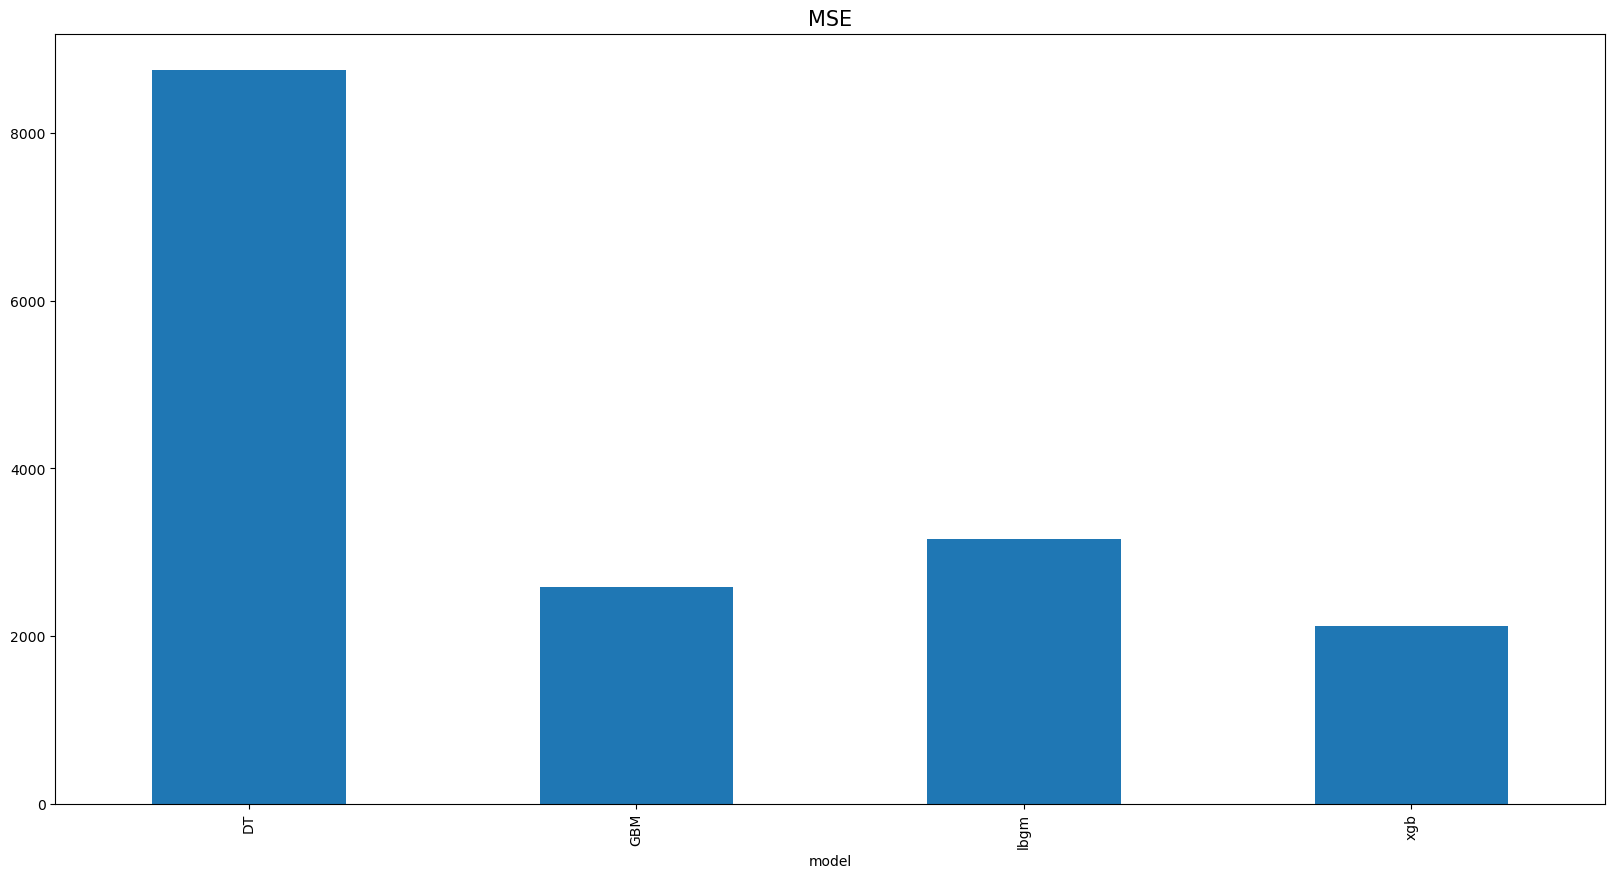

In [74]:
effect.set_index(["model"], inplace=True)

# Plot MSE
ax = effect['MSE'].plot(kind="bar")
ax.set_title('MSE', fontsize=15)
plt.show()

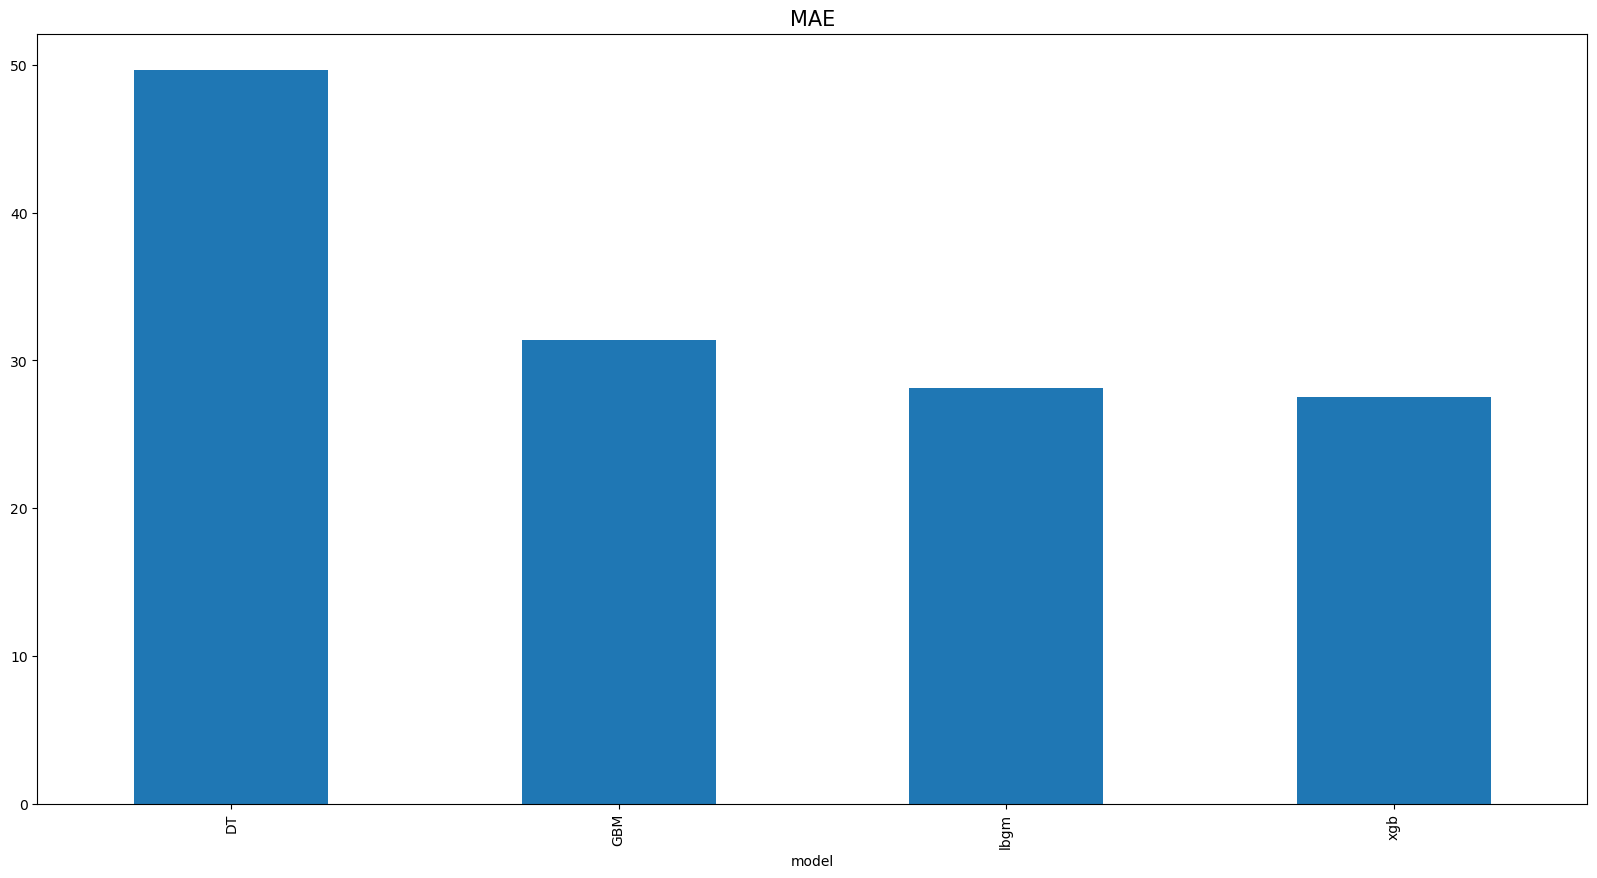

In [75]:
# Plot MAE 
ax = effect['MAE'].plot(kind="bar")
ax.set_title('MAE', fontsize=15)
plt.show()

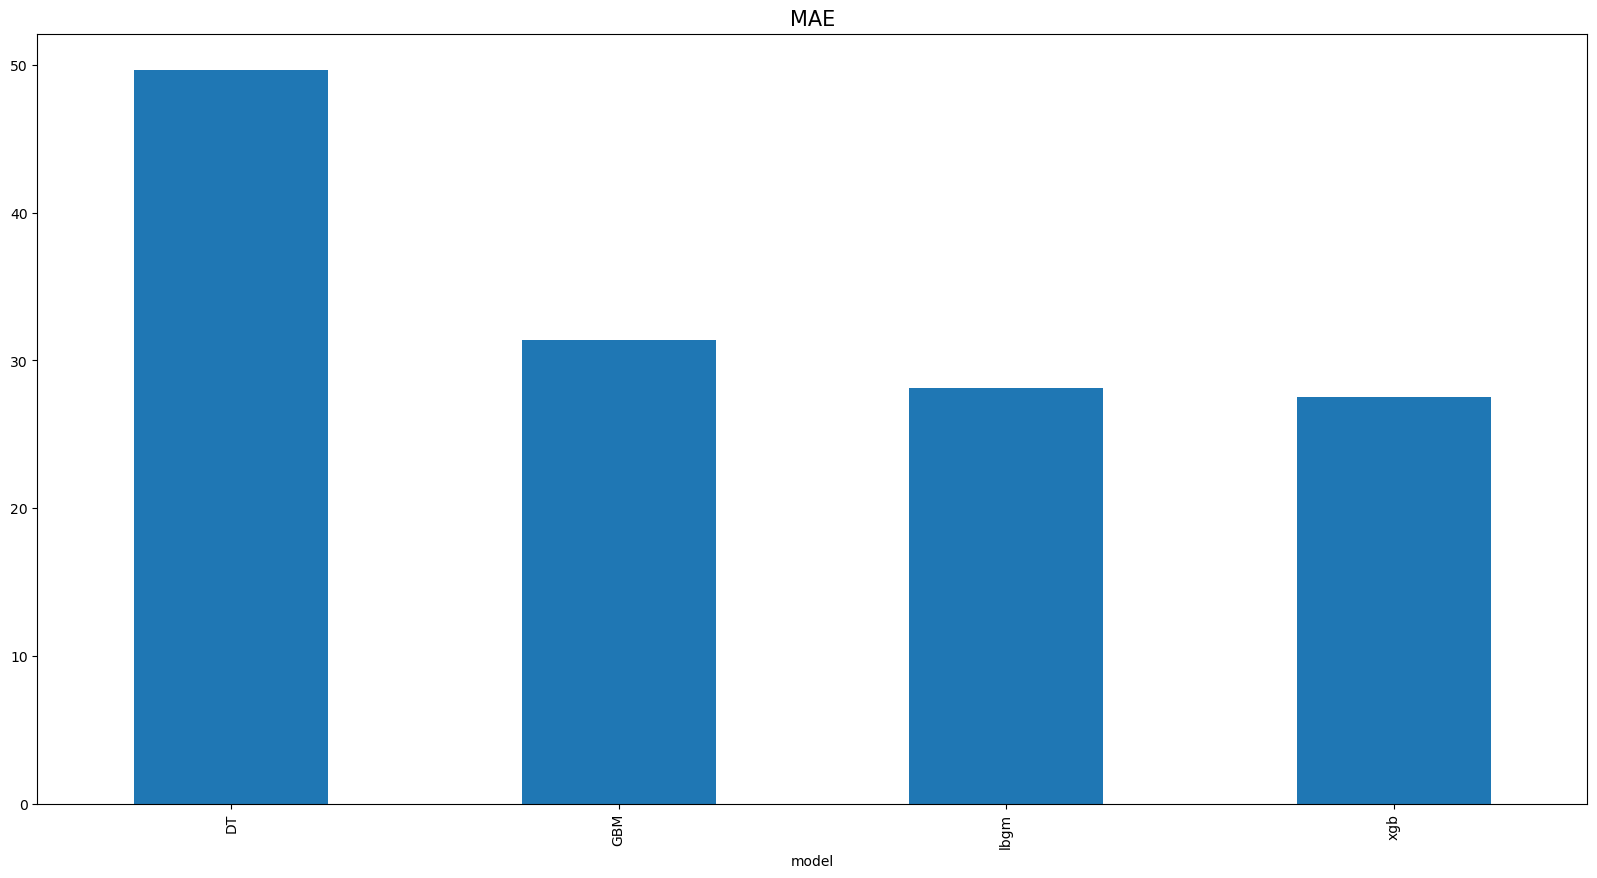

In [76]:
# Plot RMSE 
ax = effect['MAE'].plot(kind="bar")
ax.set_title('MAE', fontsize=15)
plt.show()

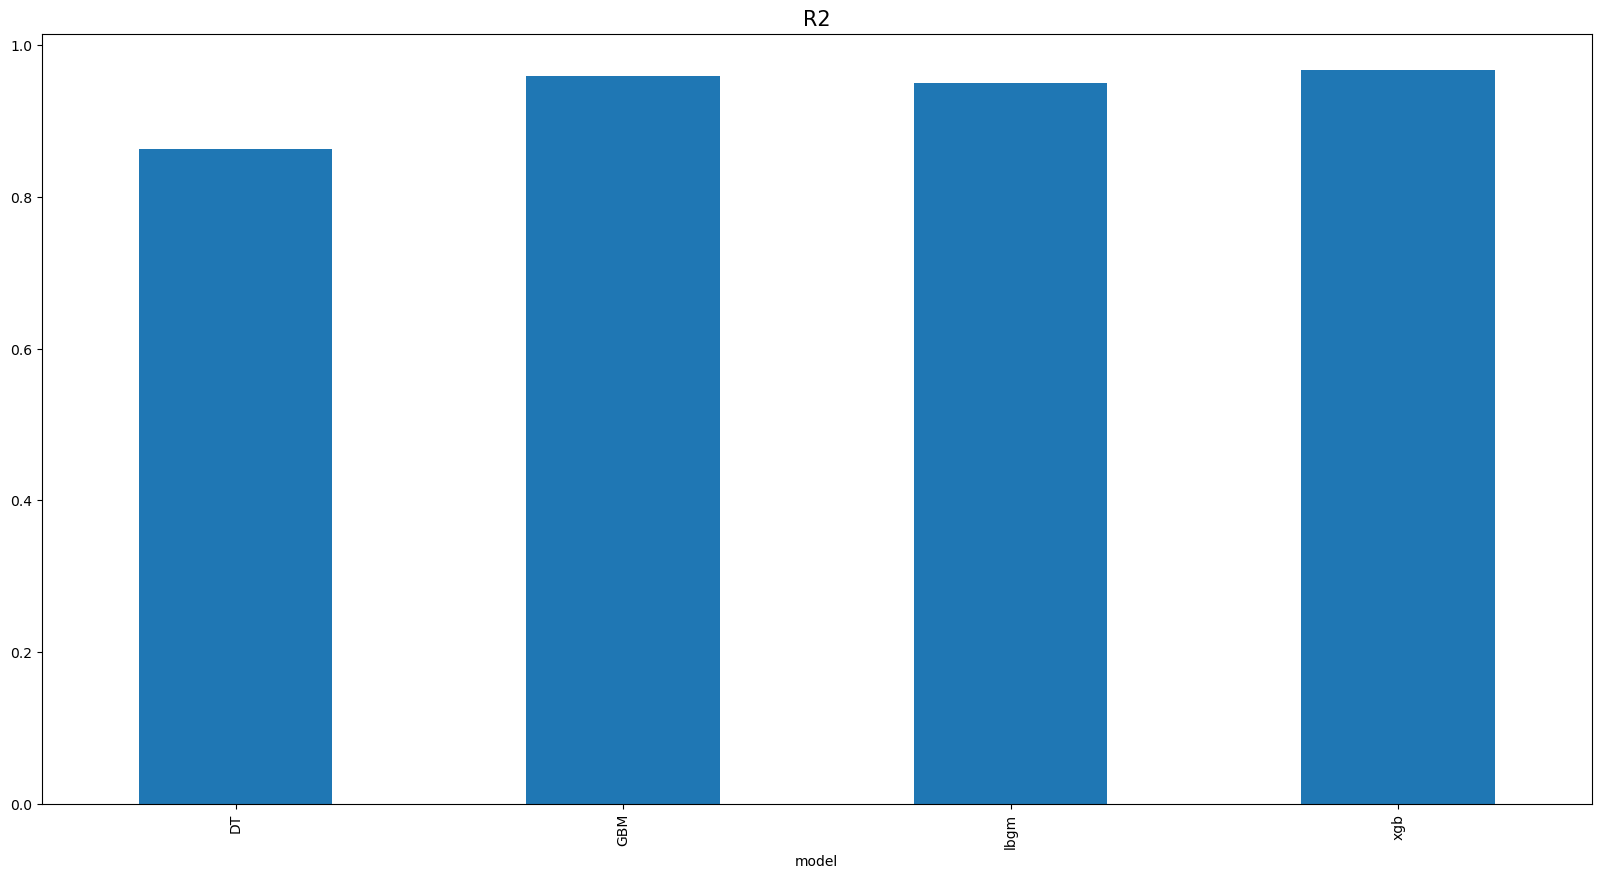

In [77]:
# Plot R2
ax = effect['R2'].plot(kind="bar")
ax.set_title('R2', fontsize=15)
plt.show()


#### 
Although all four supervised machine learning models attained satisfactory performance scores, xgb attained the best performance score across all performance measurses. As a result, xgb is selected as the base model for this problem. 